In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 반출 코드 정리
- k means + minmax
- 밀도기반 클러스터링
- 이상치 확인
- 시각화

### 클러스터링과 KMeans를 이용한 데이타의 군집화

KMeansKMeans 클러스터링 알고리즘은 n개의 중심점을 찍은 후에, 이 중심점에서 각 점간의 거리의 합이 가장 최소화가 되는 중심점 n의 위치를 찾고, 이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 클러스터링 알고리즘이다.
아래 그림을 보면 3개의 군집이 존재하는 것을 볼 수 있다. 각 군집별로 중심점이 찍혀 있는데, 이 중심점의 위치를 움직여 가면서 각 군집의 데이타와 중심점의 거리가 가장 작은 중심점을 찾는 것이다.

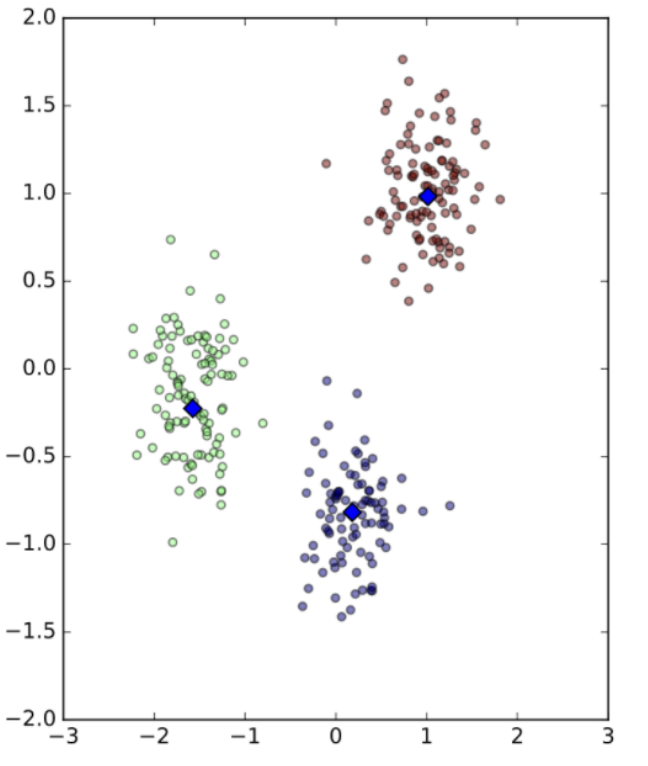

In [ ]:
# 최적의 군집화 갯수 찾기
ks = range(1,10)
inertias = []
for k in ks:    
    model = KMeans(n_clusters=k)    
    model.fit(feature)    
    inertias.append(model.inertia_) 
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
# 아래는 예시

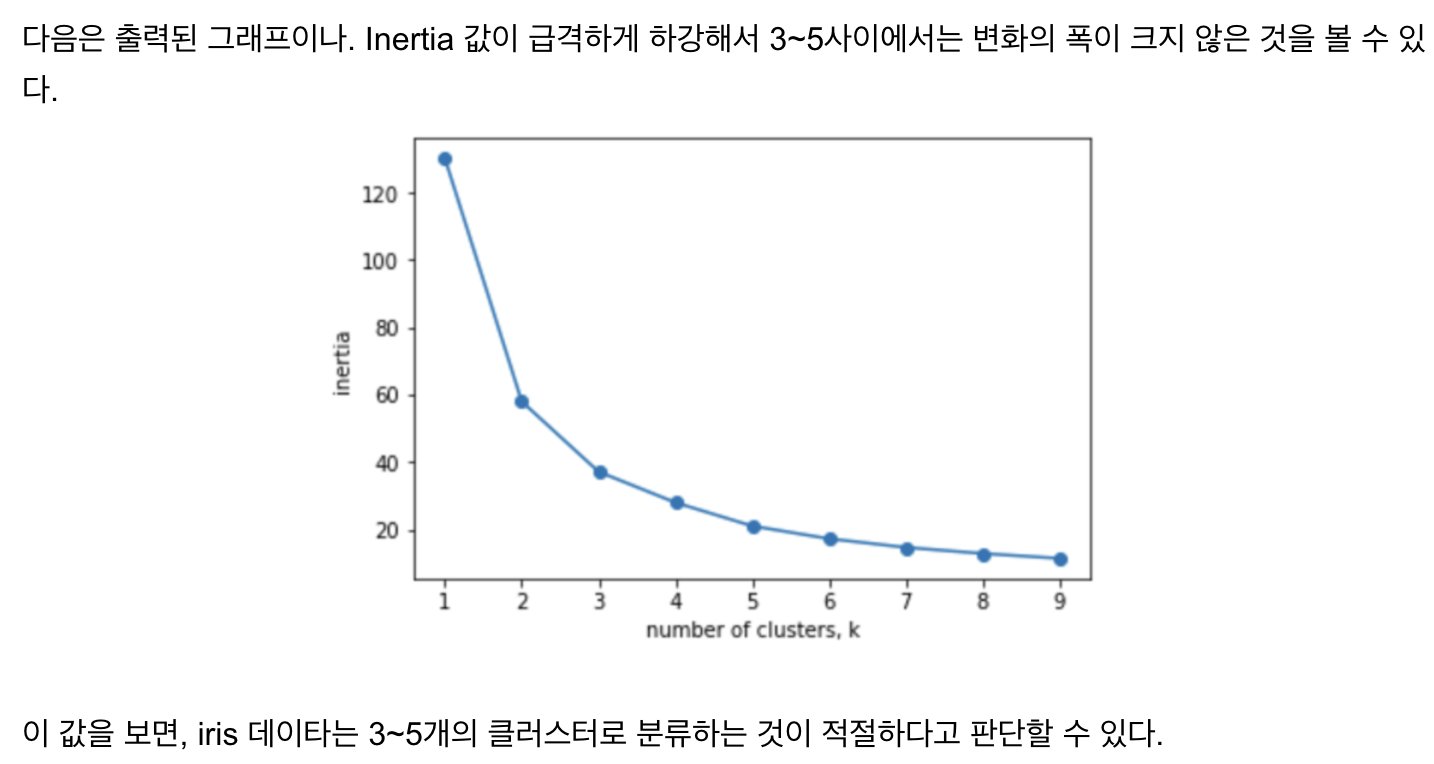

### K-Means 클러스터링 파이썬 연습 예제 – 고객 구매 데이터 분석

In [ ]:
# pandas 패키지 임포트
import pandas as pd

# read_excel() 함수를 이용하여 파일 불러오기
data = pd.read_excel('CustomerDataSet.xls')

# 데이터 몇 행만 보기
data.head()

In [ ]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = data.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(processed_data[['ItemsBought', 'ItemsReturned']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

In [ ]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7)
       # 클러스터 생성
       estimator = KMeans(n_clusters = i)
       ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
        plt.subplot(3, 2, i)
        plt.tight_layout()
        # 서브플롯의 라벨링
        plt.title("K value = {}".format(i))
        plt.xlabel('ItemsBought')
        plt.ylabel('ItemsReturned')
        # 클러스터링 그리기
        plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=ids)  
plt.show()

In [ ]:
# K = 3으로 클러스터링
estimator = KMeans(n_clusters = 3)

# 클러스터링 생성
cluster_ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=cluster_ids)

# 제품과 클러스터 id로 데이터에 범례 달기
for index, c_id, bought, returned, zip_code, product in processed_data.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

In [ ]:
# 플로팅하기
plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=cluster_ids)

# 우편번호로 범례달기
for (index, c_id, bought, returned, zip_code, product) in data.itertuples():
    plt.annotate(zip_code,(bought + 0.6, returned + 0.6))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()

### 밀도기반 클러스터링

장점DBSCAN 알고리즘의 장점은 K Means와 같이 클러스터의 수를 정하지 않아도 되며, 클러스터의 밀도에 따라서 클러스터를 서로 연결하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾을 수 있음.
출처: https://bcho.tistory.com/1205?category=555440 [조대협의 블로그:티스토리]

In [21]:
# 
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# IRIS 데이타를 DataFrame으로 로딩 한 다음, 학습에 사용할 피쳐를 다음과 같이 feature 변수에 저장한다.
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# 다음은 모델을 선언하고, 데이타를 넣어서 학습을 시킨다. 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

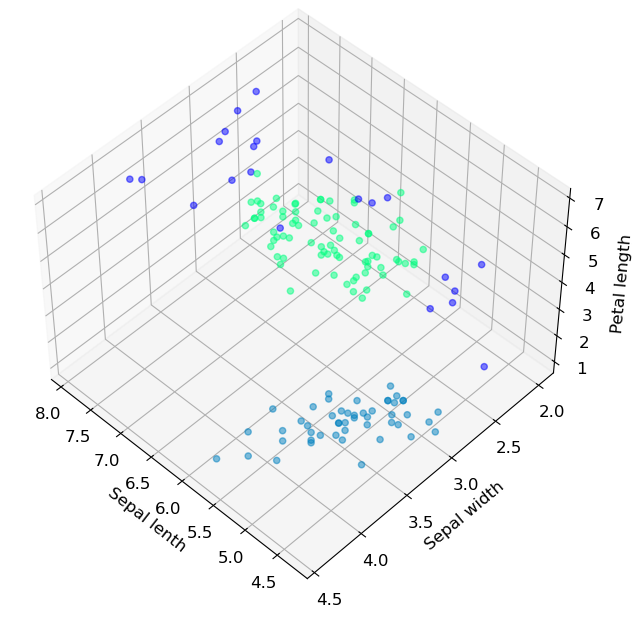

In [27]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()


In [ ]:
# 마지막으로 Cross tabulazation 을 이용하여 모델을 검증해보면 다음과 같은 결과를 얻을 수 있다. 

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

### 이상치 확인

In [ ]:
q3 = df.quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = df.quantile(0.25)

iqr = q3 - q1

In [ ]:
# '국어' 열에 대하여 이상치 여부를 판별해주는 함수
def is_kor_outlier(df):
    kor_score = df['국어']
    if kor_score > q3['국어'] + 1.5 * iqr['국어'] or kor_score < q1['국어'] - 1.5 * iqr['국어']:
        return True
    else:
        return False

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df['국어_이상치여부'] = df.apply(is_kor_outlier, axis = 1) # axis = 1 지정 필수

df

### 시각화

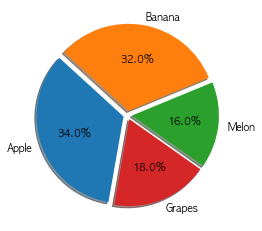

In [9]:
# 파이차트
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True)
plt.show()

- autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
- startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
- explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정합니다.

  파이 차트 안에는 해당 항목이 전체의 몇 퍼센트인지 값 표시를 해주어야 할 때가 있는데, 이때 autopct를 사용하면 된다. 어떤 형식으로 표시할지 문자열 포매팅을 활용한다.
  '%0.2f' — 소숫점 두번째자리 까지 보여준다.  4.08
  '%0.2f%%' — 소숫점 두번째자리까지 보여주고 맨 뒤에 ‘%’ 기호를 붙인다.  4.08%.
  (% 기호를 두 번 쓰는 이유는 문자열 포매팅 할 때 처음 % 기호가 이스케이프 문자처럼 작동하기 때문이다.)
  '%d%%' — 가장 가까운 정수로 반올림하고 맨 뒤에 % 기호를 붙인다.  4%.

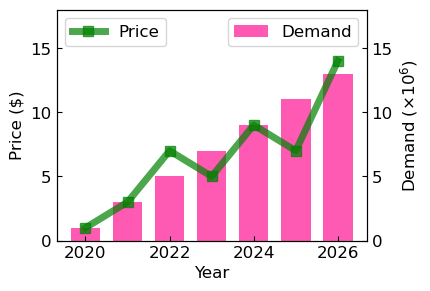

In [10]:
# Matplotlib 두 종류의 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

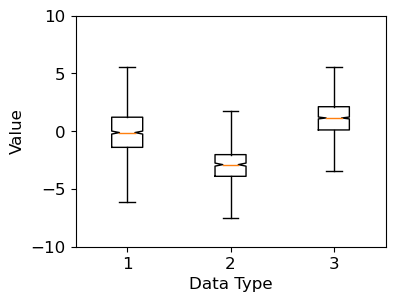

In [11]:
# 박스플롯
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c], notch=True, whis=2.5)
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

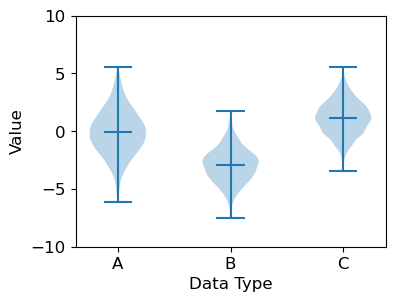

In [13]:
# 바이올린 플롯 그리기
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.violinplot([data_a, data_b, data_c], showmeans=True)
ax.set_ylim(-10.0, 10.0)
ax.set_xticks(np.arange(1, 4))
ax.set_xticklabels(['A', 'B', 'C'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

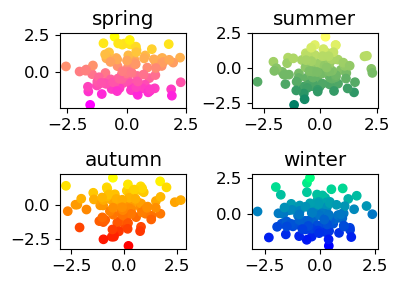

In [14]:
# 컬러바
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
arr = np.random.standard_normal((8, 100))

plt.subplot(2, 2, 1)
# plt.scatter(arr[0], arr[1], c=arr[1], cmap='spring')
plt.scatter(arr[0], arr[1], c=arr[1])
plt.spring()
plt.title('spring')

plt.subplot(2, 2, 2)
plt.scatter(arr[2], arr[3], c=arr[3])
plt.summer()
plt.title('summer')

plt.subplot(2, 2, 3)
plt.scatter(arr[4], arr[5], c=arr[5])
plt.autumn()
plt.title('autumn')

plt.subplot(2, 2, 4)
plt.scatter(arr[6], arr[7], c=arr[7])
plt.winter()
plt.title('winter')

plt.tight_layout()
plt.show()

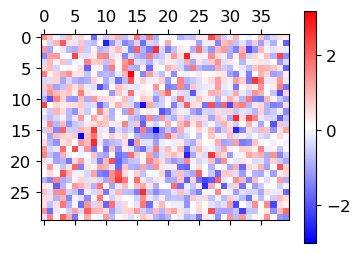

In [15]:
# 히트맵
import matplotlib.pyplot as plt
import numpy as np

arr = np.random.standard_normal((30, 40))
# cmap = plt.get_cmap('PiYG')
# cmap = plt.get_cmap('BuGn')
# cmap = plt.get_cmap('Greys')
cmap = plt.get_cmap('bwr')

plt.matshow(arr, cmap=cmap)
plt.colorbar()
plt.show()

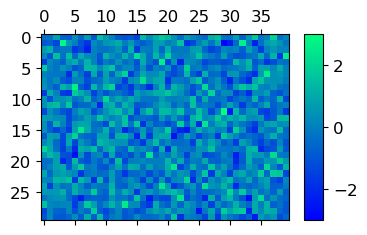

In [18]:
import matplotlib.pyplot as plt
import numpy as np

arr = np.random.standard_normal((30, 40))

plt.matshow(arr)
plt.colorbar(shrink=0.8, aspect=10)
# plt.clim(-1.0, 1.0)
plt.clim(-3.0, 3.0)
# 히트맵에 표시될 색상의 범위를 지정하기 위해서 clim() 함수를 사용

plt.show()


colorbar() 함수의 shrink 파라미터는 컬러바의 크기를 결정합니다.

shrink 파라미터의 디폴트 값은 1.0이며, 예제에서는 0.8로 지정했습니다.

colorbar() 함수의 aspect 파라미터는 컬러바의 종횡비 (Aspect ratio)를 결정합니다.

aspect 파라미터의 디폴트 값은 20이며, 예제에서는 10으로 지정했습니다.